<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/teaching/306_materials/003_lab6_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Midterm Review

## February 15th, 2022

- Midterm should be released the 18th, due the 25th

- Rules for the midterm can be found here:  https://github.com/ambujtewari/stats306-winter2022/blob/main/midterm/README.md

- No labs/lectures next week!

- I can only answer clarifying questions during the exam. No hints/debugging


In [1]:
install.packages('dslabs') # install this package
library(dslabs)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
gapminder %>% glimpse # similar to head() or summary()

Rows: 10,545
Columns: 9
$ country          <fct> "Albania", "Algeria", "Angola", "Antigua and Barbuda"…
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,…
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, 37.…
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 70.8…
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2.70,…
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 1867396,…
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966778…
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, Ame…
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, Cari…


### 1. Filter out all countries with `NA` for gdp and assign filtered dataset to a variable called `df`.

In [3]:
df = gapminder %>% filter(!is.na(gdp))

# bad way of doing this]
# df = gapminder %>% filter(gdp != NA)

head(df)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
2,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
3,Australia,1960,20.30,70.87,3.45,10292328,96677859364,Oceania,Australia and New Zealand
4,Austria,1960,37.30,68.75,2.70,7065525,52392699681,Europe,Western Europe
5,Bahamas,1960,51.00,62.00,4.50,109526,1306269490,Americas,Caribbean
6,Bangladesh,1960,176.30,46.20,6.73,48200702,12767231590,Asia,Southern Asia


### 2. `gdp` is in dollars. Convert it to billion dollars and save it to same dataset, df. 

In [4]:
df = df %>% mutate(gdp = gdp/1e9)

head(df)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Algeria,1960,148.20,47.50,7.65,11124892,13.828152,Africa,Northern Africa
2,Argentina,1960,59.87,65.39,3.11,20619075,108.322327,Americas,South America
3,Australia,1960,20.30,70.87,3.45,10292328,96.677859,Oceania,Australia and New Zealand
4,Austria,1960,37.30,68.75,2.70,7065525,52.392700,Europe,Western Europe
5,Bahamas,1960,51.00,62.00,4.50,109526,1.306269,Americas,Caribbean
6,Bangladesh,1960,176.30,46.20,6.73,48200702,12.767232,Asia,Southern Asia


### 3. Get records from the year 2011 and save it to `df2011`.

In [5]:
df2011 = df %>% filter(year == 2011)

head(df2011)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,2011,14.3,77.4,1.75,2886010,6.3216909,Europe,Southern Europe
2,Algeria,2011,22.8,76.1,2.83,36717132,81.1434481,Africa,Northern Africa
3,Angola,2011,106.8,58.1,6.10,21942296,27.0139358,Africa,Middle Africa
4,Antigua and Barbuda,2011,7.2,75.9,2.12,88152,0.8017879,Americas,Caribbean
5,Argentina,2011,12.7,76.0,2.20,41655616,472.9352552,Americas,South America
6,Armenia,2011,15.3,73.5,1.50,2967984,4.2909906,Asia,Western Asia


### 4a. Which countries have data in both 1960 and 2011?

In [6]:
countries1960 = df %>% filter(year == 1960) %>% select(country) %>% deframe # deframe turns our single selected column into a list

countries_both <- df2011 %>% filter(country %in% countries1960) %>% select(country) %>% deframe

 ### 4b. What is the fraction of these out of the number of distinct countries overall?



In [7]:
n_countries <- n_distinct(df$country)

length(countries_both) / n_countries

[1] 0.4918919

### 5a. Using `df2011`, create a `gdp` box plot for each region. Make sure the region names are legible and also use `log10 scale`!

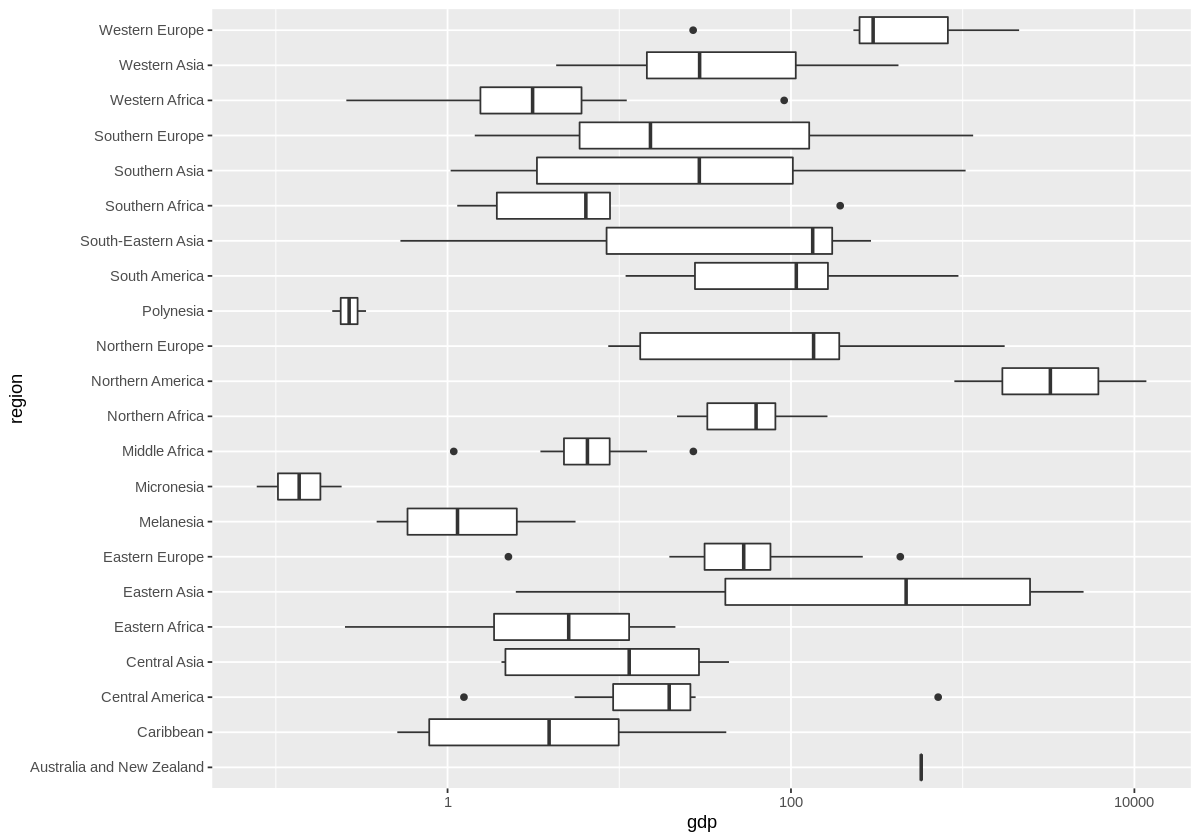

In [8]:
options(repr.plot.width=10)
df2011 %>% ggplot(aes(y = region, x = gdp)) + 
  geom_boxplot() + scale_x_log10()

### 5b. Using `df2011`, create a `freqpoly` plot of life expectancy by continent.

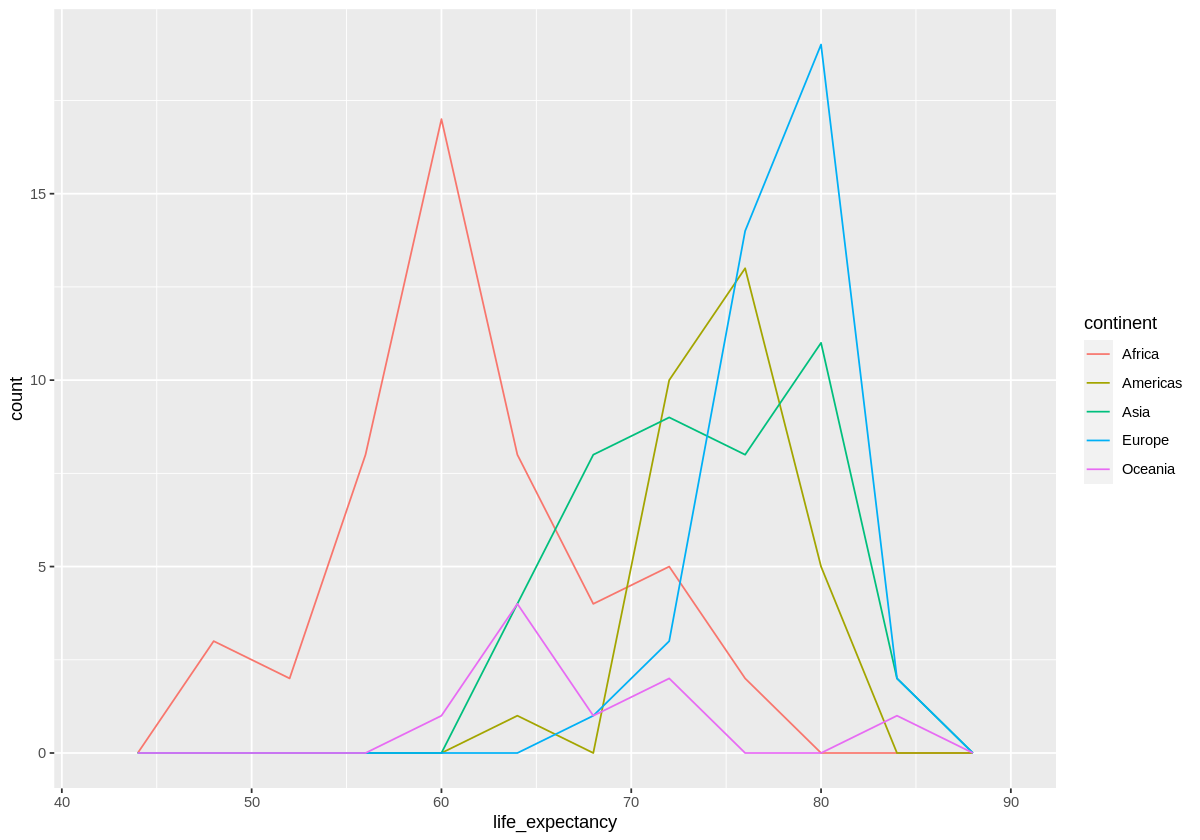

In [9]:
df2011 %>% ggplot(aes(x = life_expectancy, colour=continent)) +
  geom_freqpoly(binwidth=4)

# density plot
# df2011 %>% ggplot(aes(x = life_expectancy, colour=continent, y = ..density..)) +
#   geom_freqpoly(binwidth=4)

### 6a. Using `df2011`, find the maximum and minimum `gdp` in each region.

In [10]:
df2011 %>% group_by(region) %>% summarise(min_gdp = min(gdp), max_gdp = max(gdp))

region,min_gdp,max_gdp
<fct>,<dbl>,<dbl>
Australia and New Zealand,573.45398217,5.734540e+02
Caribbean,0.50986673,4.199806e+01
Central America,1.24595697,7.197424e+02
Central Asia,2.06071523,4.354728e+01
Eastern Africa,0.25273737,2.122808e+01
Eastern Asia,2.49791871,5.058762e+03
Eastern Europe,2.26158771,4.331921e+02
Melanesia,0.38648318,5.563353e+00
Micronesia,0.07739471,2.415812e-01


### 6b. Find the name of the countries with min/max GDP per region.

In [11]:
df2011 %>% group_by(region) %>% slice_max(gdp) %>% select(region, country, gdp)

# the same for min: 

# df2011 %>% group_by(region) %>% slice_min(gdp) %>% select(region, country, gdp)

region,country,gdp
<fct>,<fct>,<dbl>
Australia and New Zealand,Australia,5.734540e+02
Caribbean,Dominican Republic,4.199806e+01
Central America,Mexico,7.197424e+02
Central Asia,Kazakhstan,4.354728e+01
Eastern Africa,Tanzania,2.122808e+01
Eastern Asia,Japan,5.058762e+03
Eastern Europe,Russia,4.331921e+02
Melanesia,Papua New Guinea,5.563353e+00
Micronesia,"Micronesia, Fed. Sts.",2.415812e-01


### 7a. Using `df2011`, find the average world gdp. Use 2 types of average: median and mean. 

In [13]:
world_mean <- df2011 %>% summarise(mean(gdp)) %>% deframe
print(world_mean)

world_median <- df2011 %>% summarise(median(gdp)) %>% deframe
print(world_median)

[1] 246.9549
[1] 16.03127


### 7b. Calculate the percentage of countries which have a gdp more than the world average in each region.

In [14]:
df2011 %>% group_by(region) %>% 
  summarise(perc_mean = 100 * sum(gdp > world_mean)/n(), perc_median = 100 * sum(gdp > world_median)/n()) %>% 
  arrange(desc(perc_median), desc(perc_mean))

region,perc_mean,perc_median
<fct>,<dbl>,<dbl>
Australia and New Zealand,100.00000,100.00000
Northern America,100.00000,100.00000
Western Europe,71.42857,100.00000
Northern Africa,0.00000,100.00000
Eastern Europe,20.00000,90.00000
Eastern Asia,66.66667,83.33333
South America,20.00000,80.00000
Northern Europe,20.00000,70.00000
Western Asia,13.33333,66.66667


### 8. Using `df2011`, Find the gdp per capita, which is simply $GDP_{per capita} = \frac{GDP}{Population}$. Find an appropriate plot to show its relationship with `gdp`, conditioned on `continent`. Remember that gdp in df2011 is in billions, so adjust for that in gdp per capita to convert back to dollars. When graphing, use the log10 scale for gdp like earlier!

`geom_smooth()` using formula 'y ~ x'



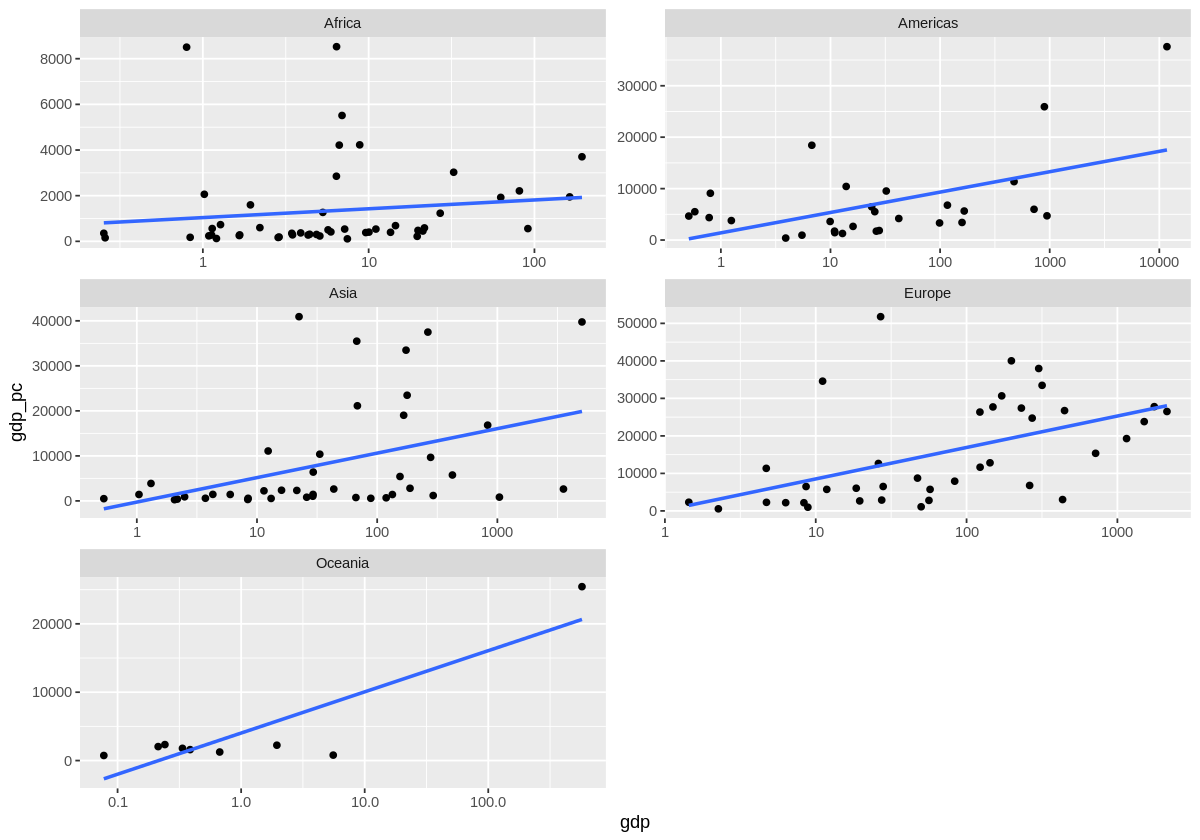

In [15]:
df2011 <- df2011 %>% mutate(gdp_pc = 1e9 * gdp/population)

# approach 1
df2011 %>%
  ggplot(aes(x = gdp, y = gdp_pc)) + geom_point() + scale_x_log10() + 
  geom_smooth(method = 'lm', se = F) + 
  facet_wrap(~continent, scale = "free", ncol = 2)

`geom_smooth()` using formula 'y ~ x'



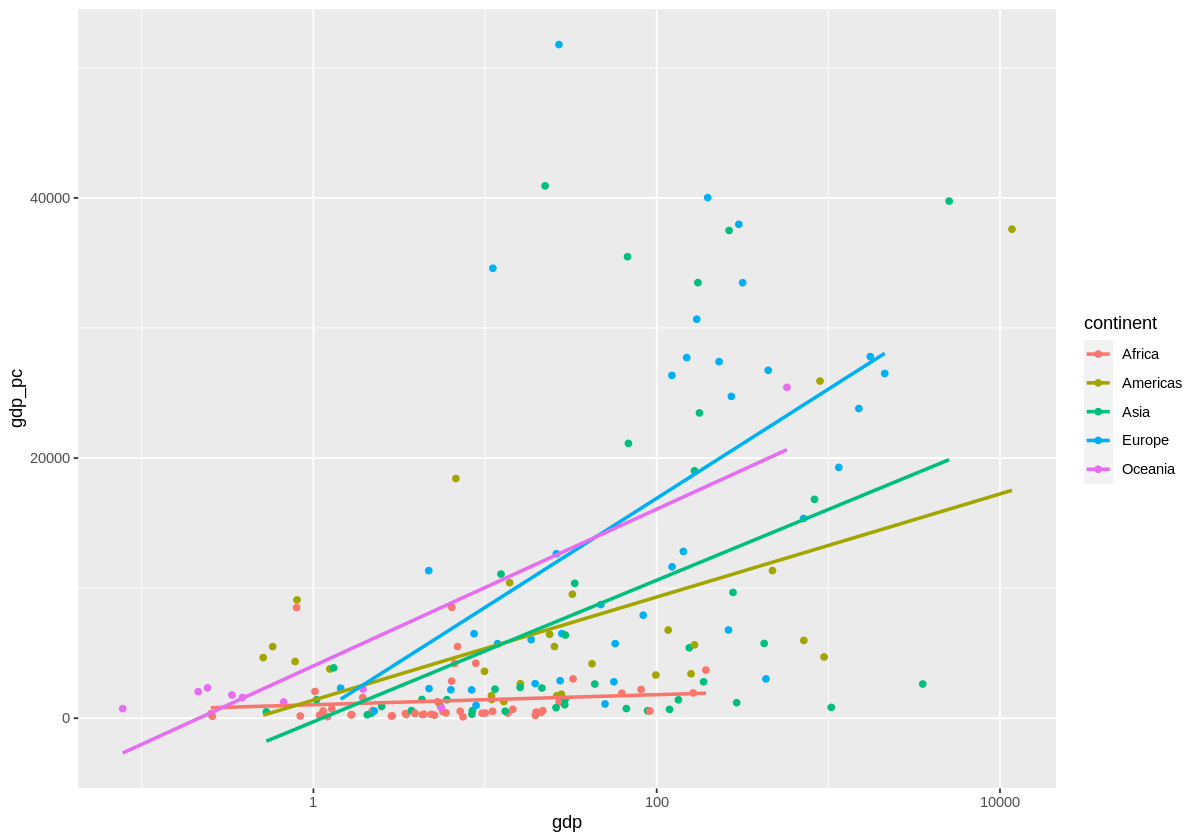

In [16]:
# approach 2
df2011 %>%
  ggplot(aes(x = gdp, y = gdp_pc)) + geom_point(aes(colour=continent)) + scale_x_log10() + 
  geom_smooth(aes(colour=continent), method = 'lm', se = F) # + 
  # facet_wrap(~continent, scale = "free", ncol = 2)

### 9. Which country has the largest gdp per capita, among the ones that have $gdp>1000$ billion?

In [17]:
df2011 %>% filter(gdp>1000) %>% slice_max(gdp_pc)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdp_pc
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
Japan,2011,2.3,82.6,1.39,127252900,5058.762,Asia,Eastern Asia,39753.61


### 10. Which country has the life expectancy which is closest to life expectancy in US. Is it a single country? or countries?

In [22]:
US_LE <- df2011 %>% filter(country == "United States") %>% select(life_expectancy) %>% deframe

df2011 %>% filter(country != "United States") %>%
  mutate(around_US = abs(life_expectancy - US_LE)) %>% arrange(around_US) %>% head

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdp_pc,around_US
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,Chile,2011,7.5,78.9,1.84,17201305,116.631547,Americas,South America,6780.389,0.0
2,Saudi Arabia,2011,14.2,78.9,2.76,28788438,278.403467,Asia,Western Asia,9670.669,0.0
3,Kuwait,2011,8.9,79.0,2.65,3239181,68.439294,Asia,Western Asia,21128.580,0.1
4,Turkey,2011,15.3,78.8,2.08,73517002,422.738755,Asia,Western Asia,5750.218,0.1
5,Peru,2011,15.6,78.5,2.48,29759891,98.901255,Americas,South America,3323.307,0.4
6,Maldives,2011,10.1,79.6,2.31,338618,1.311837,Asia,Southern Asia,3874.091,0.7


### 11. Plot life expectancy versus gdp per capita (on an appropriate scale) with points colored by geographic region.

`geom_smooth()` using formula 'y ~ x'



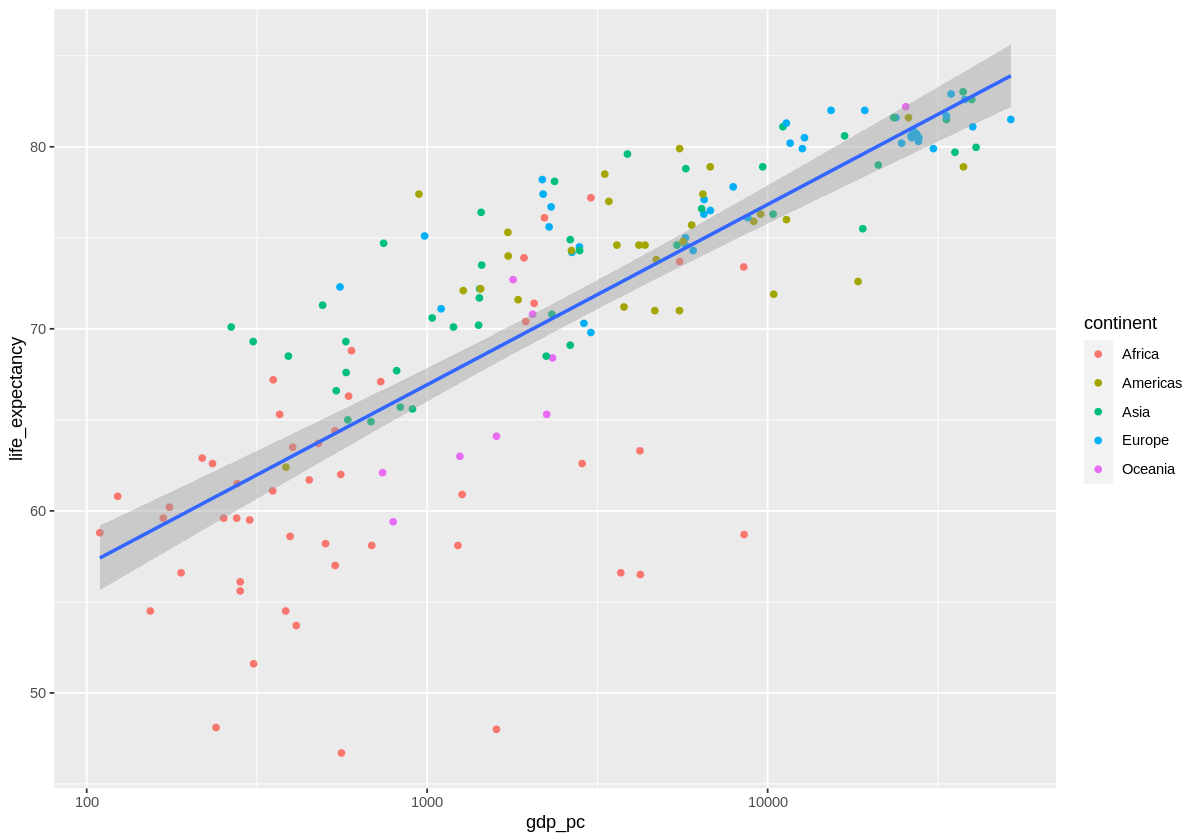

In [31]:
# this plot actually looks pretty bad when colored by region,
# so I colored by continent instead
ggplot(df2011, aes(x=gdp_pc, y=life_expectancy)) + geom_point(aes(colour=continent)) +
  geom_smooth(method="lm") + scale_x_log10()

### 12. Which countries have seen the greatest gains in life expectancy from 1960 to 2011?

In [49]:
df_both <- df %>% filter(country %in% countries_both) %>% filter(year %in% c(1960, 2011))

df_both %>% arrange(country, year) %>% group_by(country) %>%
  summarise(le_gain = last(life_expectancy) - first(life_expectancy)) %>% 
  arrange(desc(le_gain)) %>% head(10)

country,le_gain
<fct>,<dbl>
China,44.37
Turkey,31.89
Oman,31.66
Peru,29.55
Nepal,29.50
Algeria,28.60
Bolivia,28.33
South Korea,27.58
Nicaragua,26.71


### 13. Visually analyze the relationship between fertility and gdp per capita. Do you notice a pattern? Does this pattern change by year?

`geom_smooth()` using formula 'y ~ x'



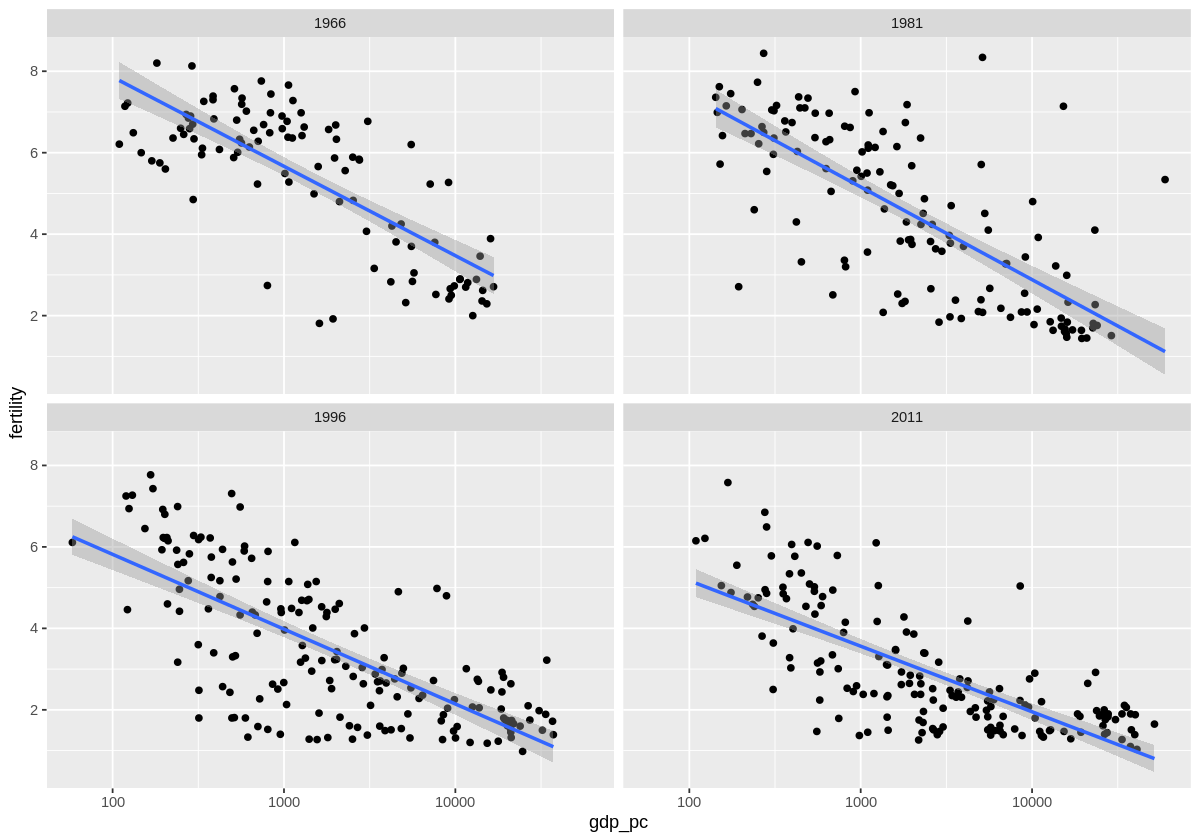

In [41]:
df %>% filter(year %in% c(2011, 1996, 1981, 1966)) %>%
   mutate(gdp_pc = 1e9 * gdp/population) %>%
  ggplot(aes(x=gdp_pc, y=fertility)) +
  facet_wrap(~year, ncol=2) + 
  geom_point() +
  geom_smooth(method="lm") + scale_x_log10()

In all years shown, gdp per capita and fertility are negatively correlated. This relationship seems to become a bit weaker with time, though this could just be because there are fewer countries with high (6+) fertility in the latest year(s).